In [1]:
# Import Libaraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load The Dataset

data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Head of the Dataset

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# General Info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Cheaking any Null Values

print(sum(data['Genre'].isnull()))
print(sum(data['Age'].isnull()))
print(sum(data['Annual Income (k$)'].isnull()))
print(sum(data['Spending Score (1-100)'].isnull()))

0
0
0
0


In [7]:
# Describing the Data

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Fixing the Column Name of Gender

data.rename(columns={'Genre':'Gender'},inplace=True)

In [10]:
# Checking the column names

data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
# Analyising the Data

data.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [12]:

import seaborn as sns
sns.set()

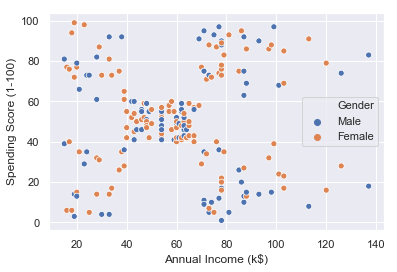

In [13]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=data['Gender'],data=data)

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Demographics')

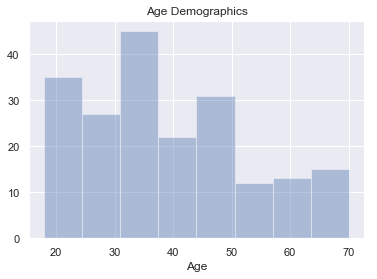

In [16]:
sns.distplot(data['Age'],kde=False)
plt.title('Age Demographics')

In [17]:
# Now Clustering the Dataset

X = data.iloc[:,[3,4]].values

In [18]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

Text(0,0.5,'Diffrence in Clusters')

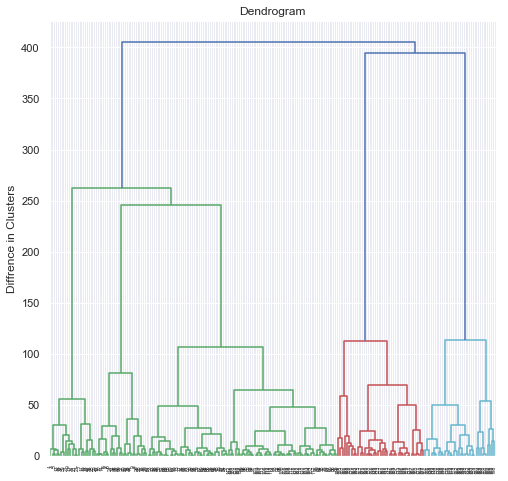

In [21]:
# Vsiualizing the Clusteres through Dendrograms


plt.figure(figsize=(8,8))
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.ylabel('Diffrence in Clusters')

In [22]:
# From the above Dendrogram , we can clearly see that their will be 5 clusters

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred = model.fit_predict(X)

In [26]:
y_pred[:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3], dtype=int64)

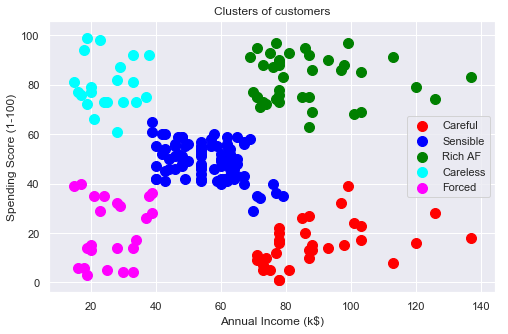

In [31]:
# Visualizing the Clusters

plt.figure(figsize=(8,5))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Sensible')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Rich AF')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Forced')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [40]:
pd.Series(model.fit_predict([[98,98],[35,15],[40,98],[197,10],[50,57],[50,59]])).map({0:'Sensible',1:'Careful',2:'Rich AF',3:'Forced',4:'Careless'})

0     Rich AF
1      Forced
2    Careless
3     Careful
4    Sensible
5    Sensible
dtype: object

In [41]:


# Hierarichal(Agglomerative) Clustering is Done!!!